In [157]:
import numpy as np
import matplotlib.pyplot as plt
import gym

In [158]:
env = gym.make('FrozenLake-v1', is_slippery=False)

In [159]:
nS = env.observation_space.n
nA = env.action_space.n

In [160]:
gamma = 0.9

In [161]:
P_sa_s = np.zeros([nS, nA, nS])
R_sa_s = np.zeros([nS, nA, nS])
for s in range(nS):
    for a in range(nA):
        transitions = env.P[s][a]
        for p_trans, next_s, r, _ in transitions:
            P_sa_s[s, a, next_s] += p_trans
            R_sa_s[s, a, next_s] = r
        P_sa_s[s, a, :] /= np.sum(P_sa_s[s, a, :])

In [162]:
Pi = np.random.rand(nS, nA)
Pi /= Pi.sum(axis=1, keepdims=True)

In [163]:
P_s_s = np.einsum('ijk, ij -> ik', P_sa_s, Pi)
R_sa = np.einsum('ijk, ijk -> ij', P_sa_s, R_sa_s)
R_s = np.einsum('ijk, ij -> i', R_sa_s, Pi)

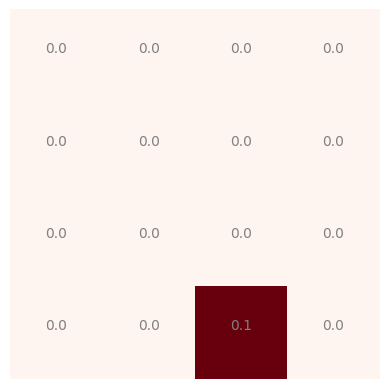

In [164]:
plt.imshow(R_s.reshape(4, 4), cmap='Reds')
for i in range(4):
    for j in range(4):
        r = np.around(R_s[4*i + j], 2)
        plt.text(j, i, r, ha='center', va='bottom', color='gray')
plt.axis('off')
plt.show()

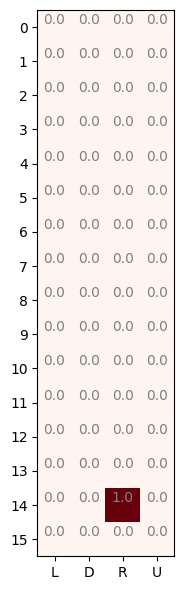

In [165]:
plt.figure(figsize=(16, 6))
plt.imshow(R_sa, cmap='Reds')
plt.yticks(np.arange(nS), np.arange(nS))
for i in range(nS):
    for j in range(nA):
        r = np.around(R_sa[i, j], 2)
        plt.text(j, i, r, ha='center', va='bottom', color='gray')
plt.xticks(np.arange(nA), ['L', 'D', 'R', 'U'])
plt.tight_layout()
plt.show()

In [166]:
V = np.zeros(nS)
BEs = []
for _ in range(40):
    V = R_s + gamma * P_s_s @ V
    err = np.linalg.norm(R_s + gamma * P_s_s @ V - V)
    BEs.append(err)

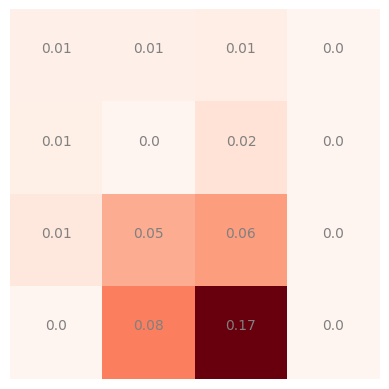

In [167]:
plt.imshow(V.reshape(4, 4), cmap='Reds')
for i in range(4):
    for j in range(4):
        v = np.around(V[4*i + j], 2)
        plt.text(j, i, v, ha='center', va='bottom', color='gray')
plt.axis('off')
plt.show()

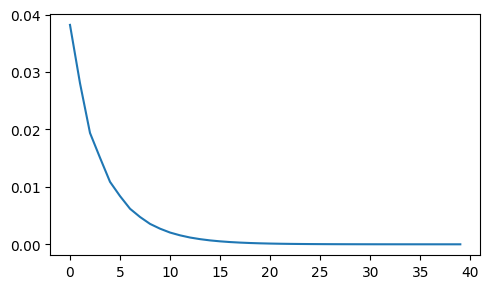

In [168]:
plt.figure(figsize=(5, 3))
plt.plot(BEs)
plt.tight_layout()
plt.show()

In [169]:
Q = R_sa + gamma * P_sa_s @ V

In [170]:
be = np.linalg.norm(R_sa + gamma * P_sa_s @ V - Q)
print(f"Bellman error in Q: {be}")

Bellman error in Q: 0.0


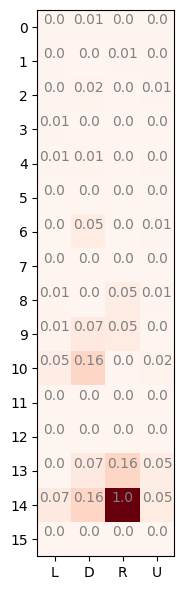

In [171]:
plt.figure(figsize=(16, 6))
plt.imshow(Q, cmap='Reds')
for i in range(nS):
    for j in range(nA):
        q = np.around(Q[i, j], 2)
        plt.text(j, i, q, ha='center', va='bottom', color='gray')
plt.yticks(np.arange(nS), np.arange(nS))
plt.xticks(np.arange(nA), ['L', 'D', 'R', 'U'])
plt.tight_layout()
plt.show()

In [172]:
def policy_evaluation(Pi):
    P_s_s = np.einsum('ijk, ij -> ik', P_sa_s, Pi)
    R_s = np.einsum('ijk, ij -> i', R_sa_s, Pi)
    
    V = np.zeros(nS)
    for _ in range(40):
        V = R_s + gamma * P_s_s @ V
        
    Q = R_sa + gamma * P_sa_s @ V
    return V, Q

In [173]:
def policy_improvement(Q):
    Pi = np.zeros((nS, nA))
    for s in range(nS):
        a = np.argmax(Q[s, :])
        Pi[s, a] = 1
    return Pi

In [174]:
V_old = np.zeros(nS)
Q_old = np.zeros((nS, nA))
Pi = np.random.rand(nS, nA)
Pi /= Pi.sum(axis=1, keepdims=True)
for _ in range(100):
    V, Q = policy_evaluation(Pi)
    Pi = policy_improvement(Q)
    
    assert np.all(V >= V_old)
    assert np.all(Q >= Q_old)
    
    V_old = V
    Q_old = Q

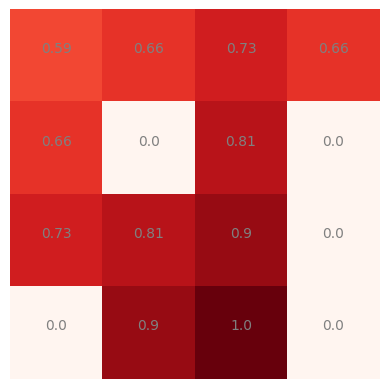

In [176]:
plt.imshow(V.reshape(4, 4), cmap='Reds')
for i in range(4):
    for j in range(4):
        v = np.around(V[4*i + j], 2)
        plt.text(j, i, v, ha='center', va='bottom', color='gray')
plt.axis('off')
plt.show()

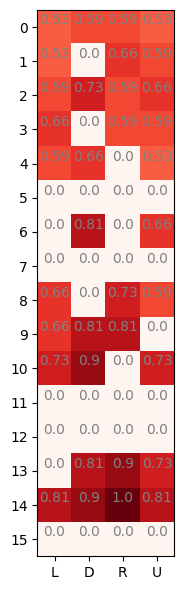

In [177]:
plt.figure(figsize=(16, 6))
plt.imshow(Q, cmap='Reds')
for i in range(nS):
    for j in range(nA):
        q = np.around(Q[i, j], 2)
        plt.text(j, i, q, ha='center', va='bottom', color='gray')
plt.yticks(np.arange(nS), np.arange(nS))
plt.xticks(np.arange(nA), ['L', 'D', 'R', 'U'])
plt.tight_layout()
plt.show()